# Finland Population Data Wrangling

## Runtime Setup

In [1]:
# data processing
import pandas as pd
import numpy as np

# geographical data
import topojson as tp
import geopandas as gpd

# plotting
import matplotlib.pyplot as plt

## Artifacts and Constants

In [2]:
# input
population_finland_file_path = "../data/raw/population_finland_stat_fi.csv"
real_estate_finland_file_path = "../data/raw/real_estate_finland_stat_fi.csv"
regions_mapping_file_path = "../data/raw/regions_stat_fi.csv"
map_finland_shp_file_path = "../data/raw/map_finland/maakunta1000k_2025Polygon.shp"
# output
population_finland_region_file_path = "../data/preprocessed/population_fin_region.csv"
population_finland_province_file_path = "../data/preprocessed/population_fin_province.csv"
real_estate_finland_province_file_path = "../data/preprocessed/real_estate_fin_province.csv"
map_finland_region_json_file_path = "../data/preprocessed/map_fin_region.json"
map_finland_province_json_file_path = "../data/preprocessed/map_fin_province.json"
population_real_estate_finland_file_path = "../data/preprocessed/population_real_estate_fin.csv"

## Data Loading

In [3]:
population_finland_raw = pd.read_csv(population_finland_file_path, encoding="windows-1252")
population_finland_raw

,Area,Information,1990,1991,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Akaa,Population 31 Dec,16048.00,16096.00,16201.00,16142.00,16038.00,15986.00,15924.00,15840.00,...,17043.00,16923.00,16769.00,16611.00,16475.00,16391.00,16467.00,16473.00,16405.0,16387
1,Akaa,"Share of persons aged under 15, %",18.50,18.50,18.80,18.60,18.90,18.70,18.60,18.30,...,18.50,18.30,18.00,17.70,17.20,16.50,16.30,15.70,15.3,15.0
2,Akaa,"Share of persons aged 15 to 64, %",65.70,65.50,65.20,65.00,64.40,64.30,64.20,64.40,...,60.50,60.20,59.80,59.40,59.30,59.30,58.90,58.90,59.1,59.2
3,Akaa,"Share of persons aged 65 or over, %",15.80,16.10,16.00,16.40,16.70,17.00,17.20,17.30,...,21.00,21.50,22.20,22.90,23.50,24.20,24.80,25.40,25.6,25.8
4,Akaa,Demographic dependency ratio,52.20,52.70,53.40,53.80,55.20,55.50,55.70,55.40,...,65.30,66.20,67.20,68.30,68.70,68.60,69.70,69.80,69.2,68.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,Äänekoski,Foreign-language speakers,35.00,57.00,67.00,89.00,96.00,98.00,102.00,119.00,...,291.00,319.00,305.00,295.00,332.00,341.00,342.00,331.00,495.0,604
5232,Äänekoski,Citizens of foreign countries,47.00,80.00,101.00,126.00,137.00,135.00,141.00,170.00,...,234.00,247.00,226.00,212.00,246.00,262.00,261.00,242.00,390.0,495
5233,Äänekoski,Persons born abroad,223.00,248.00,264.00,283.00,286.00,290.00,283.00,298.00,...,443.00,466.00,456.00,443.00,478.00,494.00,489.00,484.00,640.0,740
5234,Äänekoski,Persons with foreign background,64.00,91.00,103.00,123.00,128.00,130.00,136.00,154.00,...,304.00,330.00,317.00,310.00,340.00,355.00,358.00,342.00,504.0,612


In [4]:
real_estate_finland_raw = pd.read_csv(real_estate_finland_file_path, encoding="windows-1252")
real_estate_finland_raw

,Region,2015Q1 Index,"2015Q1 Quarterly change, %","2015Q1 Annual change, %",2015Q1 Real price index,"2015Q1 Quarterly change, % (real price index)","2015Q1 Annual change, % (real price index)",2015Q1 Price per square meter (EUR/m2),2015Q1 Lower quartile,2015Q1 Medianprice,...,"2025Q2 Annual change, %",2025Q2 Real price index,"2025Q2 Quarterly change, % (real price index)","2025Q2 Annual change, % (real price index)",2025Q2 Price per square meter (EUR/m2),2025Q2 Lower quartile,2025Q2 Medianprice,2025Q2 Upper quartile,2025Q2 Average area m2,2025Q2 Number
0,Whole country,100.7,.,.,100.9,.,.,19.3,5.0,18.7,...,-5.2,90.8,2.9,-5.6,21.3,3.7,14.6,46.4,3004,573
1,Greater Helsinki,101.3,.,.,101.5,.,.,150.0,134.5,169.5,...,-23.9,131.7,0.6,-24.2,202.0,108.8,208.0,269.1,1786,40
2,Whole country - Greater Helsinki,100.5,.,.,100.6,.,.,15.0,4.4,14.1,...,2.2,79.9,3.6,1.8,15.5,3.5,12.8,41.2,3071,533
3,Satellite municipalities,100.3,.,.,100.5,.,.,38.2,41.6,61.3,...,11.0,98.6,9.7,10.5,38.0,27.0,78.5,107.6,2755,39
4,Over 100 000 inhabitants,101.8,.,.,102.0,.,.,61.3,41.4,92.7,...,-13.5,116.4,7.0,-13.9,100.0,39.3,75.0,183.7,1870,87
5,20 000 - 100 000 inhabitants,100.0,.,.,100.1,.,.,20.4,8.0,27.1,...,8.9,79.9,6.7,8.4,20.9,5.8,27.8,57.7,2896,218
6,Under 20 000 inhabitants,100.2,.,.,100.4,.,.,8.3,3.0,6.7,...,-13.4,77.6,-8.7,-13.8,9.5,2.4,7.0,16.5,3408,268
7,Southern Finland,101.9,.,.,102.1,.,.,35.1,10.0,44.9,...,-8.9,100.6,-0.9,-9.3,39.9,9.4,32.0,78.0,2591,225
8,Western Finland,97.8,.,.,97.9,.,.,13.9,3.6,13.6,...,6.0,80.5,13.7,5.6,15.6,3.0,13.3,32.1,2990,183
9,Eastern Finland,108.4,.,.,108.6,.,.,11.9,3.6,9.9,...,2.0,49.4,2.3,1.6,5.4,1.0,3.3,9.0,4939,54


In [5]:
regions_mapping = pd.read_csv(regions_mapping_file_path)
regions_mapping

,Municipality,Region,Province
0,Akaa,Pirkanmaa,Western Finland
1,Alajärvi,South Ostrobothnia,Western Finland
2,Alavieska,North Ostrobothnia,Northern Finland
3,Alavus,South Ostrobothnia,Western Finland
4,Asikkala,Päijät-Häme,Western Finland
...,...,...,...
303,Ylivieska,North Ostrobothnia,Northern Finland
304,Ylöjärvi,Pirkanmaa,Western Finland
305,Ypäjä,Kanta-Häme,Western Finland
306,Ähtäri,South Ostrobothnia,Western Finland


<Axes: >

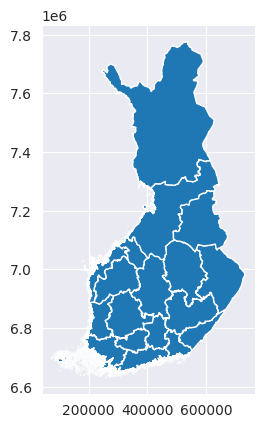

In [6]:
map_finland = gpd.read_file(map_finland_shp_file_path)
map_finland.plot()

## Data Cleaning
The data provided by the Statistics Finland website is quite clean already. For direct correct representation in the form of one single table, it needs to be restructured using the pandas `melt` function. The Area and Information columns are used repeatedly to transform whole columns into new rows.


Concerning the data quality, only empty values marked as `.` need to be filled. In the preprocessing, each of these dots is replaced by NaN. This ensures that all following aggregations work correctly.

### Population

In [7]:
population_finland = population_finland_raw.melt(
    id_vars=["Area", "Information"],
    var_name="Year",
    value_name="Value"
)
population_finland["Value"] = pd.to_numeric(
    population_finland["Value"]
    .astype(str)
    .str.strip()
    .replace(".", np.nan) # empty values are set to . in the dataset
)
population_finland["Year"] = population_finland["Year"].astype(int)

population_finland = population_finland.pivot_table(
    index=["Area", "Year"],
    columns="Information",
    values="Value"
).reset_index()


population_finland.columns.name = None
population_finland = population_finland.sort_values(["Area", "Year"]).reset_index(drop=True)

population_finland

,Area,Year,"Average age, both sexes","Average age, men","Average age, women",Citizens of foreign countries,Demographic dependency ratio,Economic dependency ratio,Finnish speakers,Foreign-language speakers,"Land area, km²",Persons born abroad,Persons with foreign background,Population 31 Dec,Sami speakers,"Share of persons aged 15 to 64, %","Share of persons aged 65 or over, %","Share of persons aged under 15, %",Swedish speakers
0,Akaa,1990,38.6,36.3,40.8,70.0,52.2,130.7,15958.0,65.0,293.08,170.0,96.0,16048.0,0.0,65.7,15.8,18.5,25.0
1,Akaa,1991,38.8,36.6,41.0,84.0,52.7,152.3,15993.0,78.0,293.08,191.0,108.0,16096.0,0.0,65.5,16.1,18.5,25.0
2,Akaa,1992,38.8,36.6,40.9,76.0,53.4,171.6,16111.0,66.0,293.08,177.0,93.0,16201.0,0.0,65.2,16.0,18.8,24.0
3,Akaa,1993,39.1,37.0,41.1,96.0,53.8,192.3,16027.0,83.0,292.99,198.0,110.0,16142.0,0.0,65.0,16.4,18.6,32.0
4,Akaa,1994,39.3,37.2,41.3,99.0,55.2,183.2,15928.0,83.0,292.99,191.0,109.0,16038.0,0.0,64.4,16.7,18.9,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10775,Äänekoski,2020,46.5,45.1,48.0,262.0,75.9,190.7,18211.0,341.0,884.58,494.0,355.0,18577.0,6.0,56.8,27.9,15.2,19.0
10776,Äänekoski,2021,46.9,45.5,48.3,261.0,76.9,174.2,17949.0,342.0,884.62,489.0,358.0,18318.0,6.0,56.5,28.6,14.9,21.0
10777,Äänekoski,2022,47.2,45.9,48.6,242.0,77.9,168.1,17761.0,331.0,884.61,484.0,342.0,18120.0,7.0,56.2,29.2,14.6,21.0
10778,Äänekoski,2023,47.6,46.2,48.9,390.0,78.0,183.7,17450.0,495.0,884.60,640.0,504.0,17971.0,7.0,56.2,29.6,14.2,19.0


### Real Estate Prices

In [8]:
real_estate_finland = real_estate_finland_raw.melt(id_vars=["Region"], var_name="Variable", value_name="Value")

real_estate_finland["Year"] = real_estate_finland["Variable"].str.extract(r"^(\d{4})Q\d").astype(int)
real_estate_finland["Quarter"] = real_estate_finland["Variable"].str.extract(r"^\d{4}Q(\d)").astype(int)
real_estate_finland["Indicator"] = real_estate_finland["Variable"].str.replace(r"^\d{4}Q\d\s*", "", regex=True)

real_estate_finland["Value"] = pd.to_numeric(
    real_estate_finland["Value"]
    .astype(str)
    .str.strip()
    .replace(".", np.nan) # empty values are set to . in the dataset
)

real_estate_finland = (
    real_estate_finland.pivot_table(
        index=["Region", "Year", "Quarter"],
        columns="Indicator",
        values="Value"
    ).reset_index()
)

real_estate_finland.columns.name = None
real_estate_finland = real_estate_finland.sort_values(["Region", "Year", "Quarter"]).reset_index(drop=True)
real_estate_finland

,Region,Year,Quarter,"Annual change, %","Annual change, % (real price index)",Average area m2,Index,Lower quartile,Medianprice,Number,Price per square meter (EUR/m2),"Quarterly change, %","Quarterly change, % (real price index)",Real price index,Upper quartile
0,20 000 - 100 000 inhabitants,2015,1,NaN,NaN,2460.0,100.0,8.0,27.1,242.0,20.4,NaN,NaN,100.1,49.0
1,20 000 - 100 000 inhabitants,2015,2,NaN,NaN,2221.0,102.9,11.0,32.1,364.0,24.7,2.9,2.7,102.8,57.7
2,20 000 - 100 000 inhabitants,2015,3,NaN,NaN,2802.0,94.2,6.7,21.7,289.0,17.0,-8.4,-8.4,94.2,48.9
3,20 000 - 100 000 inhabitants,2015,4,NaN,NaN,2698.0,103.2,8.0,28.0,258.0,20.1,9.6,9.4,103.1,50.4
4,20 000 - 100 000 inhabitants,2016,1,4.8,4.9,2118.0,104.8,8.7,30.0,231.0,24.1,1.5,1.9,105.0,59.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,Whole country - Greater Helsinki,2024,2,-7.1,-8.5,3076.0,96.0,4.0,14.1,570.0,16.1,-12.7,-12.7,78.5,44.1
458,Whole country - Greater Helsinki,2024,3,0.3,-0.7,2963.0,104.6,3.0,16.2,458.0,18.1,9.0,9.0,85.6,45.1
459,Whole country - Greater Helsinki,2024,4,-12.4,-13.2,3043.0,92.7,3.5,12.0,431.0,15.5,-11.4,-11.7,75.6,50.7
460,Whole country - Greater Helsinki,2025,1,-13.8,-14.3,3034.0,94.8,3.3,13.8,384.0,18.9,2.3,2.0,77.1,50.0


### Combining Datasets
Sadly, the real estate data is not available in the same regional granularity as the population data. For further analyses, the population statistics are aggregated to provinces. Another aggregation to regions allows for nice plots used mainly for exploration of the dataset below. 

Additionally, the population data is only available in yearly intervals. Because of this, the time granularity of the real estate data is reduced to years as well.

Finally, the result is one data table directly relating real estate prices and population statistics in Finnish provinces over time.

In [9]:
def get_population_agg_operations(data):
    return {
        "Average age, both sexes": lambda x: np.average(x, weights=data.loc[x.index, "Population 31 Dec"]),
        "Average age, men": lambda x: np.average(x, weights=data.loc[x.index, "Population 31 Dec"]),
        "Average age, women": lambda x: np.average(x, weights=data.loc[x.index, "Population 31 Dec"]),
        "Citizens of foreign countries": "sum",
        "Demographic dependency ratio": "mean",
        "Economic dependency ratio": "mean",
        "Finnish speakers": "sum",
        "Foreign-language speakers": "sum",
        "Land area, km²": "sum",
        "Persons born abroad": "sum",
        "Persons with foreign background": "sum",
        "Population 31 Dec": "sum",
        "Sami speakers": "sum",
        "Share of persons aged 15 to 64, %": lambda x: np.average(x, weights=data.loc[x.index, "Population 31 Dec"]),
        "Share of persons aged 65 or over, %": lambda x: np.average(x, weights=data.loc[x.index, "Population 31 Dec"]),
        "Share of persons aged under 15, %": lambda x: np.average(x, weights=data.loc[x.index, "Population 31 Dec"]),
        "Swedish speakers": "sum"
    }

In [10]:
population_finland_region = population_finland
population_finland_region = population_finland_region.merge(
    regions_mapping,
    left_on="Area",
    right_on="Municipality",
    how="left"
)

population_finland_region = population_finland_region.drop(columns=["Area"])
population_finland_region = population_finland_region.groupby(["Year", "Region"]).agg(get_population_agg_operations(population_finland_region)).reset_index()

In [11]:
population_finland_province = population_finland
population_finland_province = population_finland_province.merge(
    regions_mapping,
    left_on="Area",
    right_on="Municipality",
    how="left"
)

population_finland_province = population_finland_province.drop(columns=["Area"])
population_finland_province = population_finland_province.groupby(["Year", "Province"]).agg(get_population_agg_operations(population_finland_province)).reset_index()

In [12]:
real_estate_finland_province = real_estate_finland.loc[
        real_estate_finland["Region"].isin(["Northern Finland", "Eastern Finland", "Southern Finland", "Western Finland"]) 
        & real_estate_finland["Quarter"].eq(4)
    ]
real_estate_finland_province = real_estate_finland_province.rename(columns={"Region": "Province"})
real_estate_finland_province = real_estate_finland_province.drop(columns=["Quarter", "Quarterly change, %", "Quarterly change, % (real price index)"])

In [13]:
population_real_estate_finland = population_finland_province.merge(
    real_estate_finland_province,
    left_on=["Province", "Year"],
    right_on=["Province", "Year"],
    how="inner"
)

population_real_estate_finland.head()

,Year,Province,"Average age, both sexes","Average age, men","Average age, women",Citizens of foreign countries,Demographic dependency ratio,Economic dependency ratio,Finnish speakers,Foreign-language speakers,...,"Annual change, %","Annual change, % (real price index)",Average area m2,Index,Lower quartile,Medianprice,Number,Price per square meter (EUR/m2),Real price index,Upper quartile
0,2015,Eastern Finland,45.030691,43.614491,46.397441,11391.0,74.051163,193.097674,546426.0,16148.0,...,NaN,NaN,4189.0,95.6,1.5,4.7,74.0,10.0,95.5,13.7
1,2015,Northern Finland,41.411696,40.261485,42.598357,12539.0,71.769492,185.086441,647500.0,15790.0,...,NaN,NaN,3766.0,90.4,1.7,7.4,128.0,7.7,90.3,22.5
2,2015,Southern Finland,40.918147,39.496620,42.217560,133971.0,64.540000,146.645000,1580028.0,198794.0,...,NaN,NaN,2669.0,99.1,8.6,35.0,318.0,32.3,99.0,75.8
3,2015,Western Finland,42.959321,41.516291,44.357175,70521.0,71.039634,158.221341,2082114.0,97236.0,...,NaN,NaN,2565.0,101.3,4.3,13.6,206.0,13.7,101.2,33.6
4,2016,Eastern Finland,45.244514,43.845629,46.604816,12096.0,75.934884,191.344186,542865.0,17351.0,...,-17.4,-18.0,3927.0,78.9,1.9,5.0,74.0,7.0,78.3,15.0


### Combine shapes of municipalities to match combined dataset provinces

<Axes: >

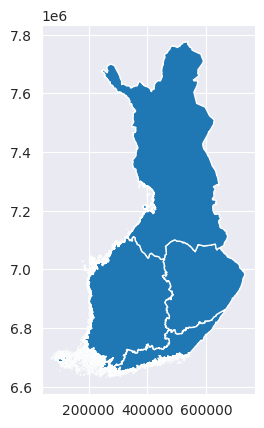

In [14]:
map_finland_provinces = map_finland.merge(regions_mapping, left_on="name", right_on="Region")
map_finland_provinces = map_finland_provinces.dissolve(by="Province")
map_finland_provinces.plot()

## Persisting Cleaned Data

In [15]:
population_finland_region.to_csv(population_finland_region_file_path, index=False)
population_finland_province.to_csv(population_finland_province_file_path, index=False)
real_estate_finland_province.to_csv(real_estate_finland_province_file_path, index=False)
tp.Topology(map_finland, prequantize=True).to_json(map_finland_region_json_file_path)
tp.Topology(map_finland_provinces, prequantize=True).to_json(map_finland_province_json_file_path)
population_real_estate_finland.to_csv(population_real_estate_finland_file_path, index=False)

## Data Exploration

### Summary statistics
The fact that we can directly calculate lots of summary statistics for all columns shows that the resulting dataset is of much higher quality than the original one. With the raw data, it was impossible to calculate any aggregate measure without decoding the values.

In [16]:
population_real_estate_finland.describe()

,Year,"Average age, both sexes","Average age, men","Average age, women",Citizens of foreign countries,Demographic dependency ratio,Economic dependency ratio,Finnish speakers,Foreign-language speakers,"Land area, km²",...,"Annual change, %","Annual change, % (real price index)",Average area m2,Index,Lower quartile,Medianprice,Number,Price per square meter (EUR/m2),Real price index,Upper quartile
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,36.000000,4.000000e+01,40.000000,40.000000,...,36.000000,36.000000,40.000000,40.00000,40.000000,40.000000,40.00000,40.000000,40.000000,40.0000
mean,2019.500000,43.584810,42.274561,44.865188,72925.275000,78.005531,164.529043,1.200601e+06,109967.925000,75418.356500,...,1.483333,-0.741667,3241.375000,101.89750,4.560000,16.900000,190.72500,18.575000,94.635000,46.1300
std,2.908872,1.836223,1.821447,1.855516,67957.769545,7.607170,18.189370,6.494616e+05,106934.587778,49784.275017,...,20.279441,19.874957,776.516438,20.00812,3.892649,15.514162,130.86595,13.616802,17.684015,33.6412
min,2015.000000,40.918147,39.496620,42.217560,11391.000000,64.540000,138.617500,5.083170e+05,15790.000000,17835.190000,...,-53.000000,-54.800000,2146.000000,48.60000,1.000000,3.600000,37.00000,4.000000,40.000000,10.0000
25%,2017.000000,42.076508,40.798215,43.343334,13839.000000,71.570625,148.567866,6.085050e+05,19411.250000,40769.935000,...,-9.050000,-10.425000,2642.000000,90.27500,1.900000,5.975000,84.75000,8.475000,88.075000,20.6750
50%,2019.500000,43.257826,42.005827,44.498159,47531.000000,78.038978,162.685247,1.105234e+06,64497.000000,67231.485000,...,1.350000,0.500000,3049.500000,101.10000,3.150000,10.750000,148.50000,14.300000,95.550000,33.4500
75%,2022.000000,44.788909,43.419490,46.139584,131325.000000,82.909079,182.790589,1.696713e+06,186960.500000,101695.955000,...,14.550000,13.250000,3734.500000,108.45000,4.350000,19.075000,249.25000,21.050000,101.475000,62.9000
max,2024.000000,47.166381,45.858776,48.433474,231495.000000,94.941860,193.097674,2.082114e+06,361986.000000,149726.900000,...,47.500000,42.000000,5064.000000,158.70000,14.200000,53.400000,576.00000,47.700000,133.400000,118.8000


### Finland Map Plots

In [17]:
def plot_country_map(data, column_name, country_map=map_finland, cmap = "viridis", figsize = (4, 6)):
    country_map_data = country_map.merge(
        data,
        left_on="name",
        right_on="Region",
        how="left"
    )

    fig, ax = plt.subplots(figsize=figsize)
    country_map_data.plot(column=column_name, cmap=cmap, legend=True, ax=ax, edgecolor="black")
    ax.set_axis_off()
    plt.title(column_name)
    
    plt.tight_layout()

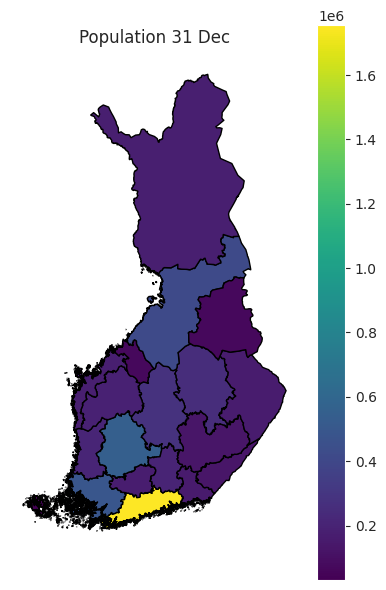

In [18]:
plot_country_map(population_finland_region[population_finland_region["Year"] == 2024], "Population 31 Dec")

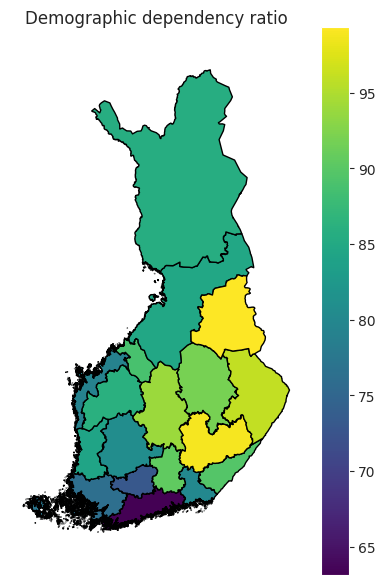

In [19]:
plot_country_map(population_finland_region[population_finland_region["Year"] == 2024], "Demographic dependency ratio")

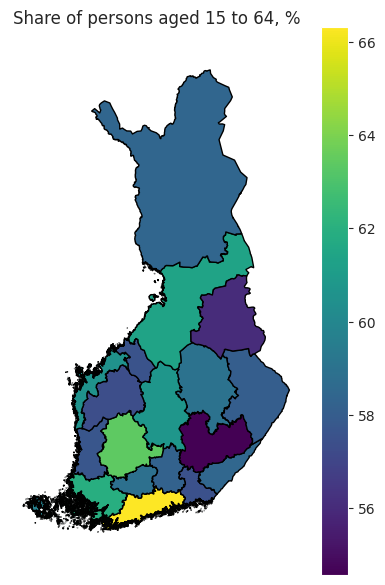

In [20]:
plot_country_map(population_finland_region[population_finland_region["Year"] == 2024], "Share of persons aged 15 to 64, %")

### Timeseries Plots

In [21]:
def plot_province_timeseries(
    data, 
    x_column,
    y_column, 
    provinces = ["Eastern Finland", "Northern Finland", "Southern Finland", "Western Finland"],
    figsize = (10, 6)
):
    plt.figure(figsize=figsize)
    
    for province in provinces:
        province_data = data[data["Province"] == province]
        plt.plot(province_data[x_column], province_data[y_column], label=province)
    
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend(title="Province")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

### Real Estate Index

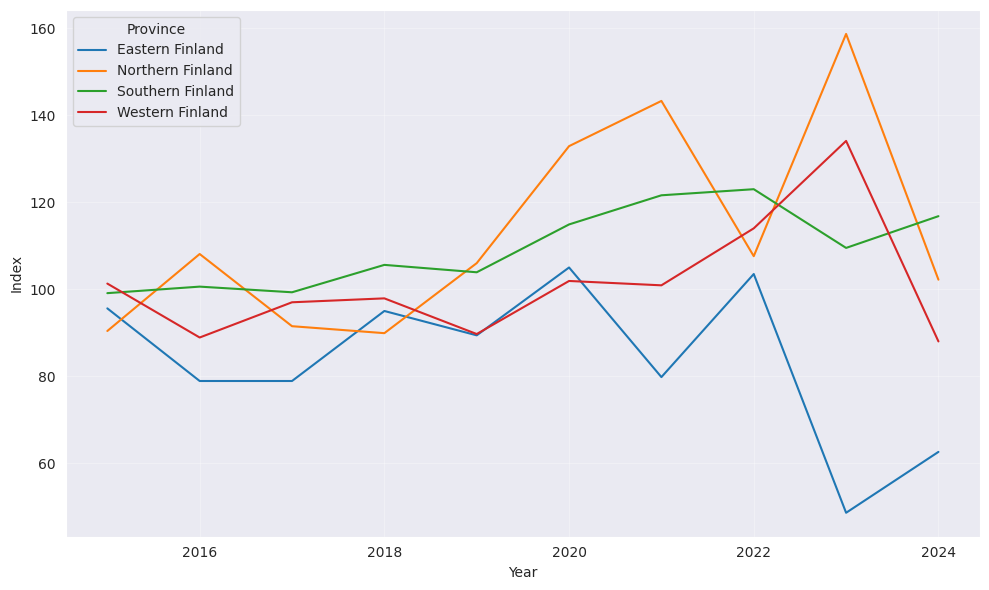

In [22]:
plot_province_timeseries(population_real_estate_finland, "Year", "Index")

### Population Dynamics
Without normalization, the plot does not look great. After dividing by the first value, one can observe the real population change over the last years. Visually, one can already observer that population changes and real estate prices had a similar trend in the last years.

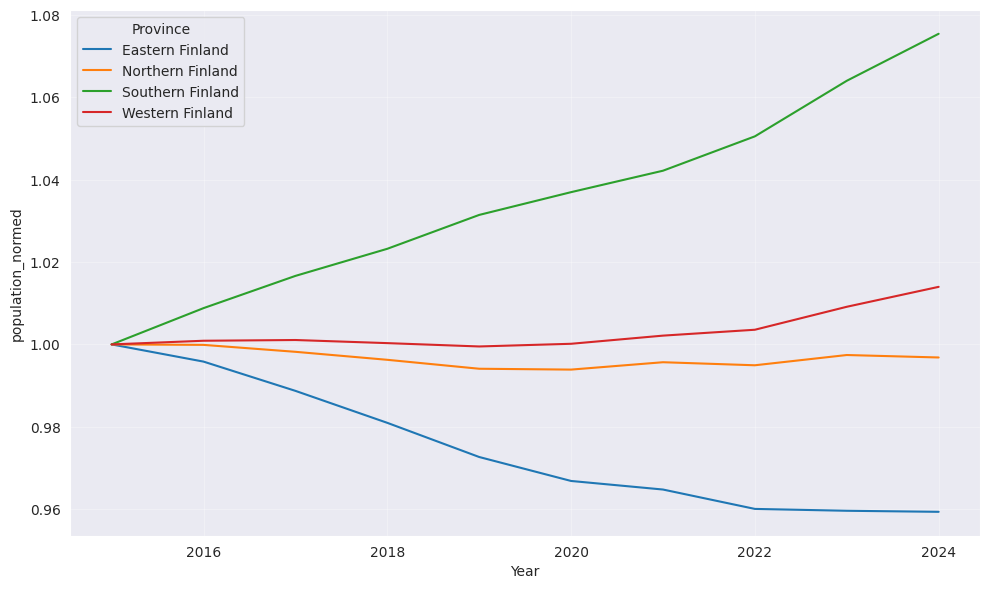

In [23]:
plot_province_timeseries(
    population_real_estate_finland.assign(
        population_normed=lambda df: df.groupby("Province")["Population 31 Dec"].transform(lambda x: x / x.iloc[0])
    ),
    "Year",
    "population_normed"
)